In [1]:
#Import 
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#E - red
#I - green

#E, I, EI, random breakage point, breakage point * combined = breakage coordinate

#for diff breakagee probability, get E, I, EI distribution and range

In [16]:
df.loc[df['party'] == 'republican', 'candidatevotes'] = df[df['party'] == 'republican']['candidatevotes']*-1
df


,E,I,EI,Breakage,Location,BrokenSide
0,1.468653,4.758763,6.227416,NA,NA,NA
1,3.070621,3.979838,7.050459,NA,NA,NA
2,0.470061,4.855962,5.326023,0.771214,4.1075,E
3,4.698746,3.281084,-7.979830,0.563339,4.49535,I
4,3.212481,0.291045,-3.503526,0.373612,1.30896,I
5,4.231661,3.122422,-7.354083,0.451678,3.32168,I
6,1.542209,3.493571,-5.035780,0.222641,1.12117,I
7,1.757924,1.976717,3.734640,0.965621,3.60625,E
8,1.751682,2.274140,4.025822,0.55624,2.23932,E
9,2.475502,0.506431,2.981933,NA,NA,NA


In [14]:
#Generate Table
random.seed()
maxLength = 5
length = 20
breakageEfficiency = 0.5

testE = []
testI = []
testEI = []
breakage = []
location = []
breakageSide = []

for x in range(length):
    testE.append(random.random()*maxLength) #add value to list
    testI.append(random.random()*maxLength)
    testEI.append(testE[-1] + testI[-1]) #create and add sum value
    #replicate breakage
    broken = random.random() #generate odds of breaking
    if broken > breakageEfficiency:
        breakagePoint = random.random() #generate random breakage percentage
        breakage.append(breakagePoint) #add breakage point to list
        location.append(breakagePoint*testEI[-1]) #add location of breakage
        if location[-1] > testE[-1]:
            breakageSide.append('E')
        else:
            breakageSide.append('I')
    else:
        breakage.append('NA')
        location.append('NA')
        breakageSide.append('NA')
            
#print(len(testE),len(testI),len(testEI),len(breakage),len(location),len(breakageSide))

table = {'E': testE, 'I': testI, 'EI': testEI, 'Breakage': breakage, 'Location': location, 'BrokenSide': breakageSide}
df = pd.DataFrame(data=table)
print(df)

           E         I        EI  Breakage Location BrokenSide
0   1.468653  4.758763  6.227416        NA       NA         NA
1   3.070621  3.979838  7.050459        NA       NA         NA
2   0.470061  4.855962  5.326023  0.771214   4.1075          E
3   4.698746  3.281084  7.979830  0.563339  4.49535          I
4   3.212481  0.291045  3.503526  0.373612  1.30896          I
5   4.231661  3.122422  7.354083  0.451678  3.32168          I
6   1.542209  3.493571  5.035780  0.222641  1.12117          I
7   1.757924  1.976717  3.734640  0.965621  3.60625          E
8   1.751682  2.274140  4.025822   0.55624  2.23932          E
9   2.475502  0.506431  2.981933        NA       NA         NA
10  1.982502  4.567602  6.550104        NA       NA         NA
11  1.200052  3.922335  5.122387        NA       NA         NA
12  2.837927  0.625913  3.463840        NA       NA         NA
13  2.519030  0.872587  3.391617   0.30668  1.04014          I
14  0.894262  1.557453  2.451716  0.661002  1.62059    

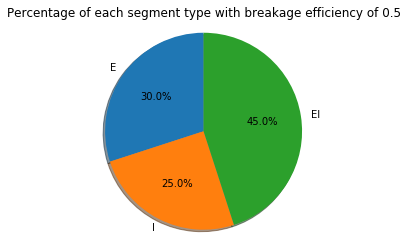

In [4]:
counts = [0,0,0]
counts[0] = list(df['BrokenSide']).count('E')
counts[1] = list(df['BrokenSide']).count('I')
counts[2] = list(df['BrokenSide']).count('NA')

labels = 'E', 'I', 'EI'
sizes = [counts[0]/length, counts[1]/length, counts[2]/length]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of each segment type with breakage efficiency of ' + str(breakageEfficiency))
plt.show()

In [5]:
#Generate Table function
random.seed()
maxLength = 5
length = 100
breakageEfficiency = 0.5

testE = []
testI = []
testEI = []
breakage = []
location = []
breakageSide = []

for x in range(length):
    #newE = random.random()*maxLength #assign value to first color randomly
    #newI = random.random()*maxLength #assign value to second color randomly
    #EnewEI = newE+newI #create sum value
    testE.append(random.random()*maxLength) #add value to list
    testI.append(random.random()*maxLength)
    testEI.append(testE[-1] + testI[-1]) #create and add sum value
    #replicate breakage
    #Change breakage by some function of length?
    broken = random.random() #generate odds of breaking
    if broken > breakageEfficiency:
        breakagePoint = random.random() #generate random breakage percentage
        breakage.append(breakagePoint) #add breakage point to list
        location.append(breakagePoint*testEI[-1]) #add location of breakage
        if location[-1] > testE[-1]:
            breakageSide.append('E')
        else:
            breakageSide.append('I')
    else:
        breakage.append('NA')
        location.append('NA')
        breakageSide.append('NA')
            
#print(len(testE),len(testI),len(testEI),len(breakage),len(location),len(breakageSide))

table = {'E': testE, 'I': testI, 'EI': testEI, 'Breakage': breakage, 'Location': location, 'BrokenSide': breakageSide}
df = pd.DataFrame(data=table)
df.head(10)

,E,I,EI,Breakage,Location,BrokenSide
0,2.267575,4.528925,6.796500,0.41691,2.83353,E
1,0.032020,4.430106,4.462126,NA,NA,NA
2,3.216881,1.447525,4.664406,NA,NA,NA
3,3.421310,2.502331,5.923642,0.314011,1.86009,I
4,0.478314,2.662406,3.140720,0.810472,2.54547,E
5,2.027823,1.341448,3.369271,NA,NA,NA
6,4.009192,1.278214,5.287405,0.0642765,0.339856,I
7,2.407705,1.741559,4.149264,NA,NA,NA
8,0.999171,4.678934,5.678105,NA,NA,NA
9,4.599940,3.192939,7.792879,0.610447,4.75714,E


In [6]:
#generate tables as functions
def generatenewcharts(maxLength, length, breakageEfficiency):
    random.seed()
#maxLength = 5
#length = 5
#breakageEfficiency = 0.5

    testE = []
    testI = []
    testEI = []
    breakage = []
    location = []
    breakageSide = []

    for x in range(length):
    #newE = random.random()*maxLength #assign value to first color randomly
    #newI = random.random()*maxLength #assign value to second color randomly
    #newEI = newE+newI #create sum value
        testE.append(random.random()*maxLength) #add value to list
        testI.append(random.random()*maxLength)
        testEI.append(testE[-1] + testI[-1]) #create and add sum value
    #replicate breakage
        broken = random.random() #generate odds of breaking
        if broken < breakageEfficiency:
            breakagePoint = random.random() #generate random breakage percentage
            breakage.append(breakagePoint) #add breakage point to list
            location.append(breakagePoint*testEI[-1]) #add location of breakage
            if location[-1] > testE[-1]:
                breakageSide.append('E')
            else:
                breakageSide.append('I')
        else:
            breakage.append('NA')
            location.append('NA')
            breakageSide.append('NA')
            
#print(len(testE),len(testI),len(testEI),len(breakage),len(location),len(breakageSide))

    table = {'E': testE, 'I': testI, 'EI': testEI, 'Breakage': breakage, 'Location': location, 'BrokenSide': breakageSide}
    df = pd.DataFrame(data=table)

    counts = [0,0,0]
    counts[0] = list(df['BrokenSide']).count('E')
    counts[1] = list(df['BrokenSide']).count('I')
    counts[2] = list(df['BrokenSide']).count('NA')
    
    sizes = [counts[0]/length, counts[1]/length, counts[2]/length]
    return sizes

In [7]:
#Empirical cumulative distribution function
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

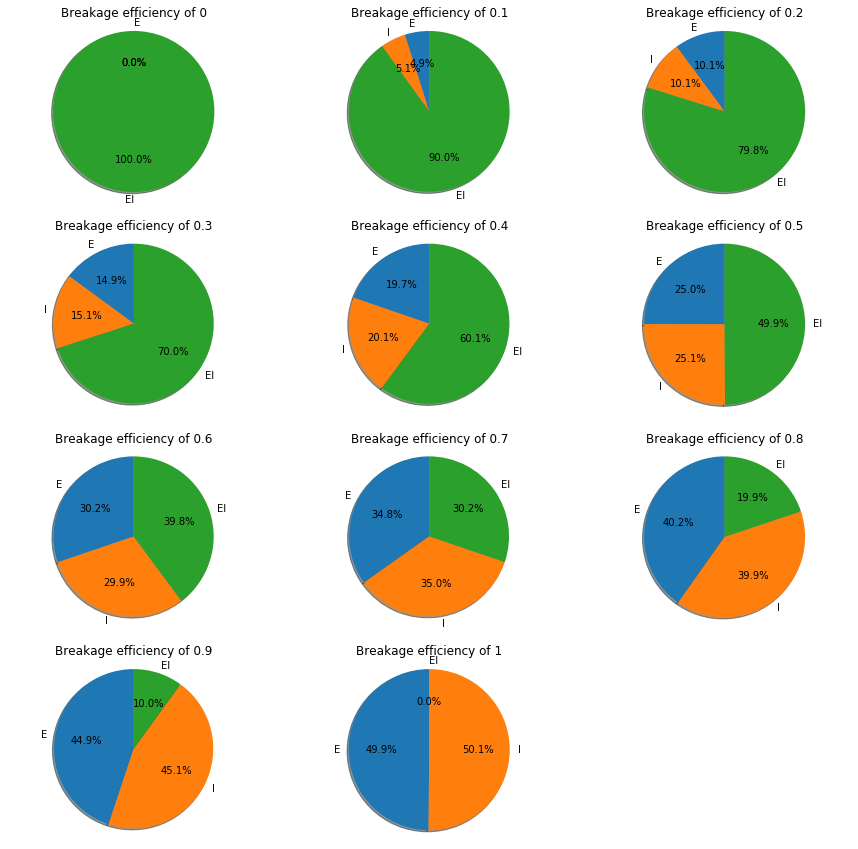

In [8]:
#Model where distributions for each shape
breakages = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

piechartdata = []

for breakage in breakages:
    piechartdata.append(generatenewcharts(5, 100000, breakage))
    
    f = plt.figure(figsize=(15,15))
    
for value in range(len(piechartdata)):
    labels = 'E', 'I', 'EI'

    #ax1 = plt.subplot(4,3, value+1)
    ax1 = f.add_subplot(4,3,value+1)
    ax1.pie(piechartdata[value], labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Breakage efficiency of ' + str(breakages[value]))

plt.show()

#curve of change in efficiency with length distributions
#compare with real data

#plot of each percentage per breakage effiviency


In [9]:
#Ecdf for models
def generatenewlengths(maxLength, length, breakageEfficiency):
    random.seed()

    finalE = []
    finalI = []
    finalEI = []
    
    for x in range(length):
    #newE = random.random()*maxLength #assign value to first color randomly
    #newI = random.random()*maxLength #assign value to second color randomly
    #newEI = newE+newI #create sum value
        testE = (random.random()*maxLength) #create data for new segments
        testI = (random.random()*maxLength)
        testEI = (testE + testI) #create and add sum value
        #replicate breakage
        broken = random.random() #generate odds of breaking
        if broken < breakageEfficiency:
            breakagePoint = random.random() #generate random breakage percentage
            breakage = (breakagePoint) #add breakage point to list
            location = (breakagePoint*testEI) #add location of breakage
            if location > testE:
                finalI.append(testEI - location)
                finalEI.append(location)       
            else:
                finalE.append(location)
                finalEI.append(testEI - location)  
        else:
            finalEI.append(testEI)
    
    return finalE, finalI, finalEI

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

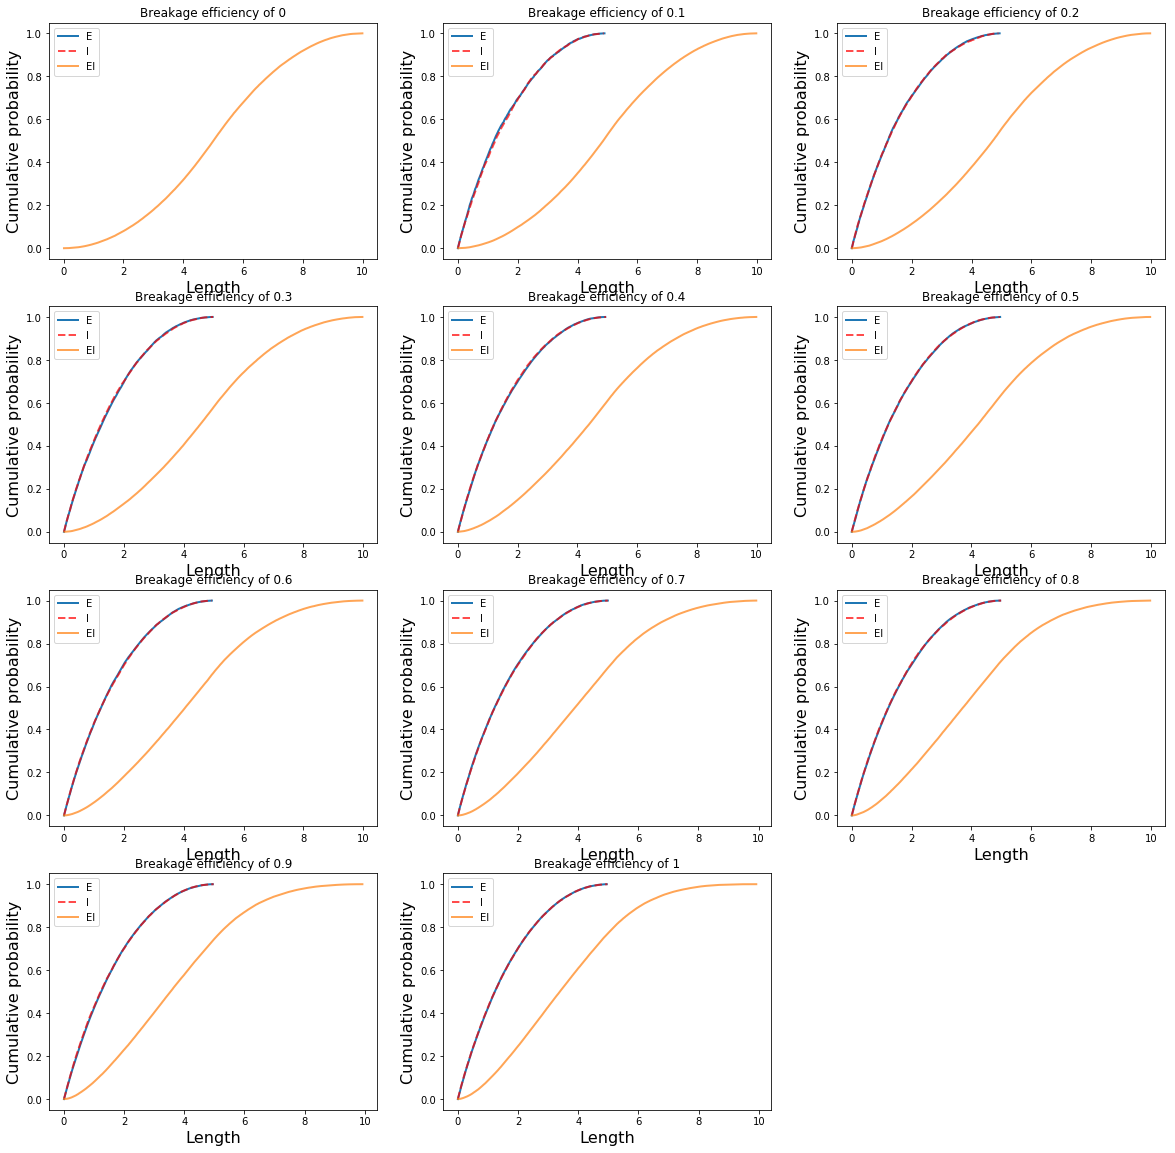

In [10]:
breakages = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

lengthdata = []

for breakage in breakages:
    lengthdata.append(generatenewlengths(5, 100000, breakage))
    
    f = plt.figure(figsize=(20,20))

for value in range(len(lengthdata)):
    ax1 = f.add_subplot(4,3,value+1)
    
    current = lengthdata[value]
    
    x,y = ecdf(current[0])
    plt.plot(x, y, label = "E", alpha = 1, linewidth = 2)
    
    x,y = ecdf(current[1])
    plt.plot(x, y, 'r--', label = "I", alpha = 0.7, linewidth = 2, )
    
    x,y = ecdf(current[2])
    plt.plot(x, y, label = "EI", alpha = 0.7, linewidth = 2)
    
    ax1.legend()
    plt.xlabel('Length', fontsize=16)
    plt.ylabel('Cumulative probability', fontsize=16)
    plt.title('Breakage efficiency of ' + str(breakages[value]))

plt.show()

In [11]:
#columns a and b are just data labels
#markers ones are labels (E,I,etc)
#can group evens
#odds are temination (1st on sides) or origin (1st in middle)
#density splicing angle and splicing length not important

#for 5 series 2 origin events meeting, rare
#classify as series multisegment > 3
#segments should be short
#can disregard 4+ temp
#do seperately

#maintain format, from other software

#different file format with only one color, length distribution

#READ ACTUAL DATA
data = pd.read_excel(open("FolderResults_1D.xls", 'rb'), sheet_name = "Sheet1")
data.head(10)

,Image_Name,Fiber_Label,Markers_1,Markers_2,Markers_3,Markers_4,Markers_5,Markers_6,Length_Of_Each_Part_1,Length_Of_Each_Part_2,Length_Of_Each_Part_3,Length_Of_Each_Part_4,Length_Of_Each_Part_5,Length_Of_Each_Part_6,nb_Of_Parts,MaxDensity,MaxSplicingAngle,MaxSplicingDistance
0,1D I+C exp010620_10_MMStack_Pos0.ome.tif,2,IdU,NaN,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,1,0.1784,8.787,27.857
1,1D I+C exp010620_10_MMStack_Pos0.ome.tif,22,IdU,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN,NaN,1,0.1319,5.955,34.525
2,1D I+C exp010620_10_MMStack_Pos0.ome.tif,32,IdU,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN,1,0.2015,1.109,39.013
3,1D I+C exp010620_10_MMStack_Pos0.ome.tif,39,IdU,NaN,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,1,0.1463,7.394,23.195
4,1D I+C exp010620_10_MMStack_Pos0.ome.tif,42,IdU,NaN,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,1,0.1142,2.141,38.833
5,1D I+C exp010620_11_MMStack_Pos0.ome.tif,4,IdU,NaN,NaN,NaN,NaN,NaN,91,NaN,NaN,NaN,NaN,NaN,1,0.1465,11.310,40.792
6,1D I+C exp010620_11_MMStack_Pos0.ome.tif,16,IdU,NaN,NaN,NaN,NaN,NaN,96,NaN,NaN,NaN,NaN,NaN,1,0.1849,14.256,39.459
7,1D I+C exp010620_11_MMStack_Pos0.ome.tif,18,IdU,NaN,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,1,0.1234,9.261,31.401
8,1D I+C exp010620_11_MMStack_Pos0.ome.tif,23,IdU,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,1,0.1177,9.983,31.000
9,1D I+C exp010620_12_MMStack_Pos0.ome.tif,17,IdU,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,1,0.1094,0.000,0.000


In [12]:
marker1 = "IdU"
marker2 = "CldU"
marker1lengths = []
marker2lengths = []
combinedlengths = []
originlengths = []
terminallengths = []

In [13]:
#one = data.loc[data['nb_Of_Parts'] == 1, ['Markers_1','Length_Of_Each_Part_1']]
one = data[data.nb_Of_Parts == 1]
one = one[['Markers_1', 'Length_Of_Each_Part_1']]

for row in range(len(one)):
    if one.iloc[row]["Markers_1"] == marker1:
        marker1lengths.append(one.iloc[row]["Length_Of_Each_Part_1"])
    else:
        marker2lengths.append(one.iloc[row]["Length_Of_Each_Part_1"])
#one
#print(len(marker1lengths), len(marker2lengths))

In [14]:
#two = data.loc[data['nb_Of_Parts'] == 2, ['Markers_1','Length_Of_Each_Part_1']]
two = data[data.nb_Of_Parts == 2]

"""
two1 = two[['Markers_1', 'Length_Of_Each_Part_1']]

two2 = two[['Markers_2', 'Length_Of_Each_Part_2']]

totalmarker1 = marker1lengths
totalmarker2 = marker2lengths
for row in range(len(one)):
    if two1.iloc[row]["Markers_1"] == marker1:
        totalmarker1.append(two1.iloc[row]["Length_Of_Each_Part_1"])
    else:
        totalmarker2.append(two1.iloc[row]["Length_Of_Each_Part_1"])

    if two2.iloc[row]["Markers_2"] == marker2:
        totalmarker2.append(two2.iloc[row]["Length_Of_Each_Part_2"])
    else:
        totalmarker1.append(two2.iloc[row]["Length_Of_Each_Part_2"])
"""        
        
twosum = two[['Length_Of_Each_Part_1', 'Length_Of_Each_Part_2']]
for row in range(len(twosum)):
    combinedlengths.append(twosum.iloc[row]["Length_Of_Each_Part_1"] +
                          twosum.iloc[row]["Length_Of_Each_Part_2"])
    
twoprocess = two[['Markers_1', 'Markers_2', 'Length_Of_Each_Part_1', 'Length_Of_Each_Part_2']]

In [15]:
origin = data[data.nb_Of_Parts == 3]
origin = origin[origin.Markers_1 == marker2]
origin2 = origin[['Length_Of_Each_Part_1','Length_Of_Each_Part_2', 'Length_Of_Each_Part_3']]

for row in range(len(origin)):
    originlengths.append(origin2.iloc[row]["Length_Of_Each_Part_1"] +
                        origin2.iloc[row]["Length_Of_Each_Part_2"] + 
                        origin2.iloc[row]["Length_Of_Each_Part_3"])
originprocess = origin[['Markers_1', 'Markers_2', 'Markers_3', 
                        'Length_Of_Each_Part_1', 'Length_Of_Each_Part_2', 'Length_Of_Each_Part_3']]

In [16]:
#termination = data.loc[data['nb_Of_Parts'] == 3 and data['Markers_1'] == marker1, ['Markers_1','Length_Of_Each_Part_1']]
terminal = data[data.nb_Of_Parts == 3]
terminal = terminal[terminal.Markers_1 == marker1]
terminal2 = terminal[['Length_Of_Each_Part_1','Length_Of_Each_Part_2', 'Length_Of_Each_Part_3']]

for row in range(len(terminal2)):
    terminallengths.append(terminal2.iloc[row]["Length_Of_Each_Part_1"] +
                        terminal2.iloc[row]["Length_Of_Each_Part_2"] + 
                        terminal2.iloc[row]["Length_Of_Each_Part_3"])
    
terminalprocess = terminal[['Markers_1', 'Markers_2', 'Markers_3', 
                            'Length_Of_Each_Part_1', 'Length_Of_Each_Part_2', 'Length_Of_Each_Part_3']]

In [17]:
#larger = data.loc[data['nb_Of_Parts'] > 3, ["Markers_1":"nb_Of_Parts"]]

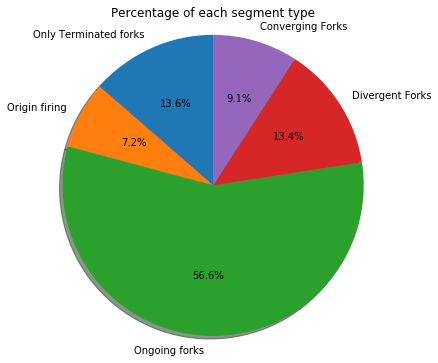

In [18]:
#plots for new
total = len(marker1lengths) + len(marker2lengths) + len(combinedlengths) + len(origin) + len(terminal)
spreadsheetdata = [len(marker1lengths)/total, len(marker2lengths)/total, 
                   len(combinedlengths)/total, len(origin)/total, len(terminal)/total]
labels = 'Only Terminated forks', 'Origin firing', 'Ongoing forks', 'Divergent Forks', 'Converging Forks'
fig1, ax1 = plt.subplots(figsize = (6,6))
ax1.pie(spreadsheetdata, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of each segment type')

plt.show()


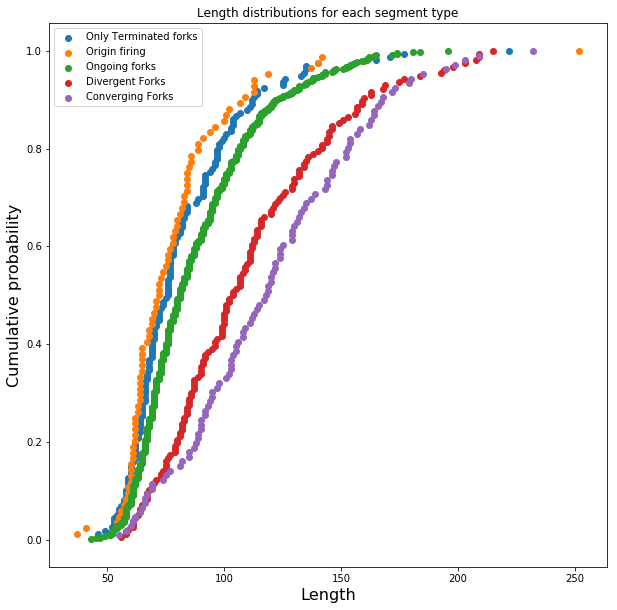

In [19]:
fig1, ax1 = plt.subplots(figsize=(10,10))


x,y = ecdf(marker1lengths) #idu only
plt.scatter(x=x, y=y, label = "Only Terminated forks")

x,y = ecdf(marker2lengths) #cldu only
plt.scatter(x=x, y=y, label = "Origin firing")

x,y = ecdf(combinedlengths) #idu + cldu
plt.scatter(x=x, y=y, label = "Ongoing forks")

x,y = ecdf(originlengths) #idu in middle
plt.scatter(x=x, y=y, label = "Divergent Forks")

x,y = ecdf(terminallengths) #cldu in middle
plt.scatter(x=x, y=y, label = "Converging Forks")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment type')

plt.show()

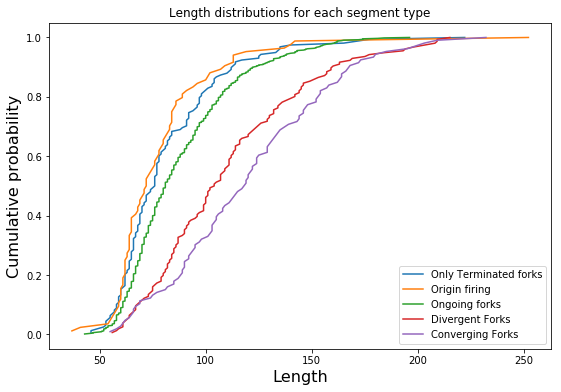

In [20]:
fig1, ax1 = plt.subplots(figsize = (9,6))

x,y = ecdf(marker1lengths)
plt.plot(x, y, label = "Only Terminated forks")

x,y = ecdf(marker2lengths)
plt.plot(x, y, label = "Origin firing")

x,y = ecdf(combinedlengths)
plt.plot(x, y, label = "Ongoing forks")

x,y = ecdf(originlengths)
plt.plot(x, y, label = "Divergent Forks")

x,y = ecdf(terminallengths)
plt.plot(x, y, label = "Converging Forks")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment type')
plt.show()

In [21]:
#Digest our data 
def digestsingle(segment, breakageEfficiency):
    random.seed()

    postbroken = []

    for x in range(len(segment)):
    #newE = random.random()*maxLength #assign value to first color randomly
    #newI = random.random()*maxLength #assign value to second color randomly
    #newEI = newE+newI #create sum value
    #replicate breakage
        broken = random.random() #generate odds of breaking
        if broken < breakageEfficiency:
            breakagePoint = random.random() #generate random breakage percentage
            location = (breakagePoint*segment[x]) #add location of breakage
            postbroken.append(location)
            postbroken.append(segment[x]-location)
        else:
            postbroken.append(segment[x])
            
#print(len(testE),len(testI),len(testEI),len(breakage),len(location),len(breakageSide))

    table = {'new':postbroken}
    df = pd.DataFrame(data=table)
    
    return postbroken

In [22]:
def digestdouble(segment, breakageEfficiency):
    random.seed()
    new1 = []
    new2 = []
    newcomb = []
    
    double1 = segment[segment.Markers_1 == marker1]
    double2 = segment[segment.Markers_2 == marker2]
    
    for x in range (len(double1)):
        broken = random.random()
        if broken < breakageEfficiency:
            breakagePoint = random.random()
            location = breakagePoint*(double1.iloc[x].Length_Of_Each_Part_1 + 
                                      double1.iloc[x].Length_Of_Each_Part_2)
            if location > double1.iloc[x].Length_Of_Each_Part_1:
                newcomb.append(location)
                new2.append(double1.iloc[x].Length_Of_Each_Part_1 + 
                            double1.iloc[x].Length_Of_Each_Part_2 - 
                            location)
            else:
                newcomb.append(double1.iloc[x].Length_Of_Each_Part_1 + 
                                   double1.iloc[x].Length_Of_Each_Part_2 - 
                                   location)
                new1.append(location)
        else:
            newcomb.append(double1.iloc[x].Length_Of_Each_Part_1 + 
                               double1.iloc[x].Length_Of_Each_Part_2)
            
    for x in range (len(double2)):
        broken = random.random()
        if broken < breakageEfficiency:
            breakagePoint = random.random()
            location = breakagePoint*(double2.iloc[x].Length_Of_Each_Part_1 + 
                                      double2.iloc[x].Length_Of_Each_Part_2)
            if location > double2.iloc[x].Length_Of_Each_Part_1:
                newcomb.append(location)
                new1.append(double2.iloc[x].Length_Of_Each_Part_1 + 
                            double2.iloc[x].Length_Of_Each_Part_2 - 
                            location)
            else:
                newcomb.append(double2.iloc[x].Length_Of_Each_Part_1 + 
                                   double2.iloc[x].Length_Of_Each_Part_2 - 
                                   location)
                new2.append(location)
        else:
            newcomb.append(double2.iloc[x].Length_Of_Each_Part_1 + 
                               double2.iloc[x].Length_Of_Each_Part_2)
            
        return new1, new2, newcomb

In [23]:
def digesttriple(segment, breakageEfficiency):
    new1 = []
    new2 = []
    newcomb = []
    newdiv = []
    newconv = []
    
    triple1 = segment[segment.Markers_1 == marker1]
    triple2 = segment[segment.Markers_2 == marker2]
    
    for x in range (len(triple1)):
        broken = random.random()
        if broken < breakageEfficiency:
            breakagePoint = random.random()
            location = breakagePoint*(triple1.iloc[x].Length_Of_Each_Part_1 + 
                                      triple1.iloc[x].Length_Of_Each_Part_2 +
                                      triple1.iloc[x].Length_Of_Each_Part_3)
            
            if location < triple1.iloc[x].Length_Of_Each_Part_1:
                newcomb.append(triple1.iloc[x].Length_Of_Each_Part_1 + 
                            triple1.iloc[x].Length_Of_Each_Part_2 +
                            triple1.iloc[x].Length_Of_Each_Part_3 - 
                            location)
                
                new1.append(location)
                
            elif location > (triple1.iloc[x].Length_Of_Each_Part_1 + 
                            triple1.iloc[x].Length_Of_Each_Part_2):
                    
                newcomb.append(location)
                
                new1.append(triple1.iloc[x].Length_Of_Each_Part_1 + 
                            triple1.iloc[x].Length_Of_Each_Part_2 +
                            triple1.iloc[x].Length_Of_Each_Part_3 - 
                            location)
            else:
                newcomb.append(triple1.iloc[x].Length_Of_Each_Part_1 + 
                            triple1.iloc[x].Length_Of_Each_Part_2 +
                            triple1.iloc[x].Length_Of_Each_Part_3 - 
                            location)
                
                newcomb.append(location)
        else:
            newconv.append(triple1.iloc[x].Length_Of_Each_Part_1 + 
                            triple1.iloc[x].Length_Of_Each_Part_2 +
                            triple1.iloc[x].Length_Of_Each_Part_3)
            
    for x in range (len(triple2)):
        broken = random.random()
        if broken < breakageEfficiency:
            breakagePoint = random.random()
            location = breakagePoint*(triple2.iloc[x].Length_Of_Each_Part_1 + 
                                      triple2.iloc[x].Length_Of_Each_Part_2 +
                                      triple2.iloc[x].Length_Of_Each_Part_3)
            
            if location < triple2.iloc[x].Length_Of_Each_Part_1:
                newcomb.append(triple2.iloc[x].Length_Of_Each_Part_1 + 
                            triple2.iloc[x].Length_Of_Each_Part_2 +
                            triple2.iloc[x].Length_Of_Each_Part_3 - 
                            location)
                
                new2.append(location)
                
            elif location > (triple2.iloc[x].Length_Of_Each_Part_1 + 
                            triple2.iloc[x].Length_Of_Each_Part_2):
                
                newcomb.append(location)
                
                new2.append(triple2.iloc[x].Length_Of_Each_Part_1 + 
                            triple2.iloc[x].Length_Of_Each_Part_2 +
                            triple2.iloc[x].Length_Of_Each_Part_3 - 
                            location)
                
            else:
                
                newcomb.append(triple2.iloc[x].Length_Of_Each_Part_1 + 
                            triple2.iloc[x].Length_Of_Each_Part_2 +
                            triple2.iloc[x].Length_Of_Each_Part_3 - 
                            location)
                
                newcomb.append(location)
                
        else:
            
            newdiv.append(triple2.iloc[x].Length_Of_Each_Part_1 + 
                          triple2.iloc[x].Length_Of_Each_Part_2 +
                          triple2.iloc[x].Length_Of_Each_Part_3)
            
    return new1, new2, newcomb, newdiv, newconv

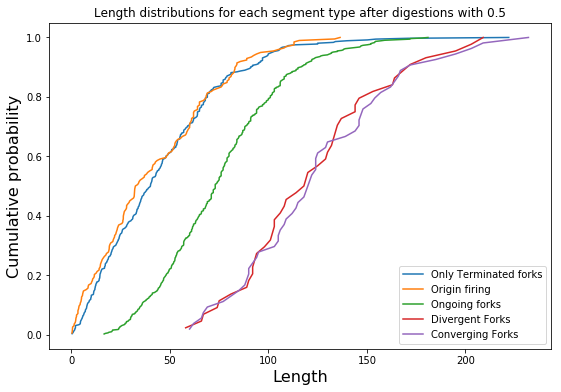

In [24]:
newmarker1 = []
newmarker2 = []
newcombined = []
newdivergence = []
newconvergence = []

digestionvalue = 0.5

newmarker1.append(digestsingle(marker1lengths, digestionvalue))
newmarker2.append(digestsingle(marker2lengths, digestionvalue))

temp1, temp2, tempcombined = digestdouble(twoprocess, digestionvalue)

newmarker1.append(temp1)
newmarker2.append(temp2)
newcombined.append(tempcombined)

temp1, temp2, tempcombined, tempdivergence, tempconvergence = digesttriple(originprocess, digestionvalue)



#newmarker1.append(temp1)
newmarker2.append(temp2)
newcombined.append(tempcombined)
newdivergence.append(tempdivergence)
newconvergence.append(tempconvergence)

temp1, temp2, tempcombined, tempdivergence, tempconvergence = digesttriple(terminalprocess, digestionvalue)

newmarker1.append(temp1)
#newmarker2.append(temp2)
newcombined.append(tempcombined)
newdivergence.append(tempdivergence)
newconvergence.append(tempconvergence)

final1 = []
final2 = []
finalcomb = []
finaldiv = []
finalconv = []

for x in range(len(newmarker1)):
    final1 += newmarker1[x]
    
for x in range(len(newmarker2)):
    final2 += newmarker2[x]

for x in range(len(newcombined)):
    finalcomb += newcombined[x]

for x in range(len(newdivergence)):
    finaldiv += newdivergence[x]

for x in range(len(newconvergence)):
    finalconv += newconvergence[x]
    
fig1, ax1 = plt.subplots(figsize = (9,6))

x,y = ecdf(final1)
plt.plot(x, y, label = "Only Terminated forks")

x,y = ecdf(final2)
plt.plot(x, y, label = "Origin firing")

x,y = ecdf(finalcomb)
plt.plot(x, y, label = "Ongoing forks")

x,y = ecdf(finaldiv)
plt.plot(x, y, label = "Divergent Forks")

x,y = ecdf(finalconv)
plt.plot(x, y, label = "Converging Forks")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment type after digestions with ' + str(digestionvalue))

plt.show()

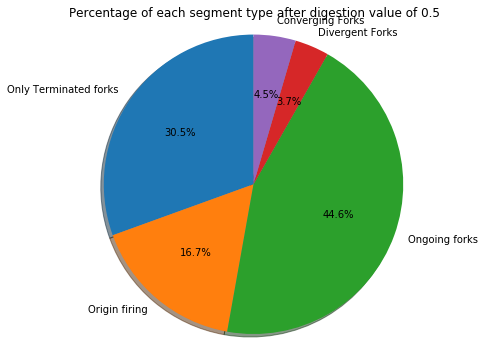

In [25]:
total = len(final1) + len(final2) + len(finalcomb) + len(finaldiv) + len(finalconv)
digestdata = [len(final1)/total, len(final2)/total, 
                   len(finalcomb)/total, len(finaldiv)/total, len(finalconv)/total]
labels = 'Only Terminated forks', 'Origin firing', 'Ongoing forks', 'Divergent Forks', 'Converging Forks'
fig1, ax1 = plt.subplots(figsize = (6,6))
ax1.pie(digestdata, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of each segment type after digestion value of ' + str(digestionvalue))

plt.show()

In [ ]:
some number of forks
probablity of termination
probability of starting
speed
generate population of tracks

natural termination? encounter with another side

Some number of forks open in genome at once (cap)

How does this data compare to experimental?
(1 hour labeling)


In [ ]:
Poisson Distrubution

Matter of time/length?
Unit of track length
Same if speed is constant

Time is duration of observing the system (30 minutes)
See replication during time period

Thousands of forks, many kinds of events
Progression at speed, activation, termination

stocastic fork and activation

track length = polymerase/time

Sum of all tracks/Total time
>want to see number of events 

make with data we get from the data 

x = random.poisson(lam=2, size=10)

lam - rate or known number of occurences e.g. 2 for above problem.

size - The shape of the returned array.